In [ ]:
import zipfile
import os

def extract_zip_file(zip_file_path, extract_path):
  """Extracts data from a zip file.

  Args:
    zip_file_path: Path to the zip file.
    extract_path: Path to the directory where the data should be extracted.
  """

  # Create the extraction directory if it doesn't exist
  if not os.path.exists(extract_path):
    os.makedirs(extract_path)

  # Open the zip file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the files to the extraction directory
    zip_ref.extractall(extract_path)

  print(f"Data extracted to: {extract_path}")

# Example usage:
zip_file_path = '/content/SheepFaceImages-20250108T114909Z-001.zip'  # Replace with your zip file path
extract_path = '/content/extracted_data'  # Replace with your desired extraction path

extract_zip_file(zip_file_path, extract_path)

Data extracted to: /content/extracted_data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import random
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

for dirname, _, filenames in os.walk('/content/extracted_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/extracted_data/SheepFaceImages/Poll Dorset/000071 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000008 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000330 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000178 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000024 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000360 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000075 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000323 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000184 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000410 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000043 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000402 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000030 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000321 P.jpg
/content/extracted_data/SheepFaceImages/Poll Dorset/000104 P.jpg
/content/extracted_data/S

In [ ]:
os.listdir("/content/extracted_data/SheepFaceImages")

['Poll Dorset', 'Suffolk', 'Marino', 'White Suffolk']

In [ ]:
marino = "/content/extracted_data/SheepFaceImages/Marino"
white_suffolk = "/content/extracted_data/SheepFaceImages/White Suffolk"
poll_dorest = "/content/extracted_data/SheepFaceImages/Poll Dorset"
suffolk = "/content/extracted_data/SheepFaceImages/Suffolk"

In [ ]:
X = []
y = []

def dataset(dir_name, breed_name):
    for i in tqdm(os.listdir(dir_name)):
        ''' joining two paths '''
        p = os.path.join(dir_name, i)
        try:
            ''' reading image '''
            img = cv2.imread(p)
            ''' resizing an image '''
            img = cv2.resize(img,(150,150))
        except:
            continue
        ''' appending images to X and labels to y'''
        X.append(img)
        y.append(breed_name)
    return X,y

In [ ]:
''' Calling dataset function to create data for earch class '''
X=[] # Reset X for each breed
y=[] # Reset y for each breed
X, y = dataset(marino,"Marino")

X_marino = X.copy() # Store Marino data separately
y_marino = y.copy()

X=[] # Reset X for each breed
y=[] # Reset y for each breed
X, y = dataset(white_suffolk,"White Suffolk")

X_white_suffolk = X.copy() # Store White Suffolk data separately
y_white_suffolk = y.copy()

X=[] # Reset X for each breed
y=[] # Reset y for each breed
X, y = dataset(poll_dorest,"Poll Dorset")

X_poll_dorest = X.copy() # Store Poll Dorset data separately
y_poll_dorest = y.copy()

X=[] # Reset X for each breed
y=[] # Reset y for each breed
X, y = dataset(suffolk,"Suffolk")

X_suffolk = X.copy() # Store Suffolk data separately
y_suffolk = y.copy()

# Combine data from all breeds
X = X_marino + X_white_suffolk + X_poll_dorest + X_suffolk
y = y_marino + y_white_suffolk + y_poll_dorest + y_suffolk

100%|██████████| 226/226 [00:00<00:00, 1675.23it/s]


In [ ]:
''' converting images to numpy'''
import numpy as np
x = np.array(X)
y = np.array(y)

''' checking shape of images '''
print(x.shape,y.shape)

(1158, 150, 150, 3) (1158,)


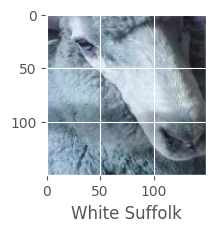

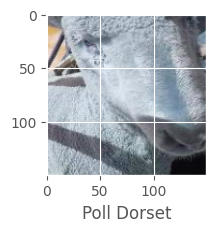

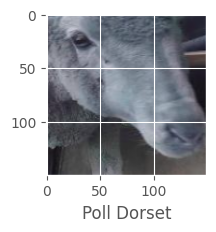

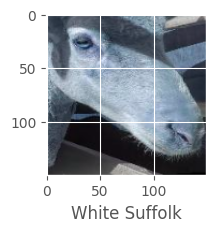

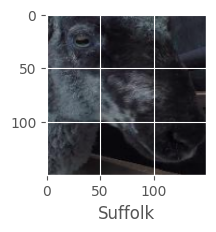

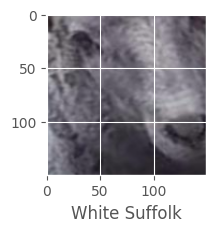

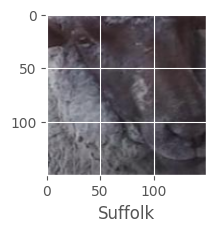

In [ ]:
''' plotting some images '''

for i in range(10):
    plt.figure(figsize = (12,7))
    indx = random.randint(0,len(y))
    img = X[indx]
    ''' 2 rows and 5 columns '''
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(img)
    plt.xlabel(y[indx])
plt.tight_layout()
plt.show()

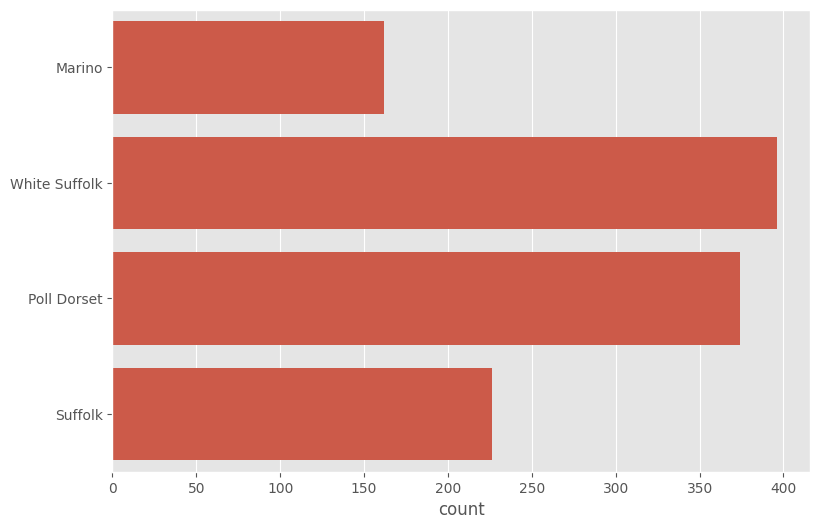

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,6))
sns.countplot(y)
plt.show()

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
img_size = 150

X_train = np.array(X)/255.0
X_test = np.array(X_test)/255.0

''' reshaping '''
X_train = X_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

''' reshaping '''
X_test = X_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [ ]:
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))

In [ ]:
for l in resnet_model.layers:
    l.trainable = False

In [ ]:
''' Final Model '''

''' container '''
model = Sequential()

''' resnet model '''
model.add(resnet_model)

''' flattening input to convert it into 1D'''
model.add(Flatten())

''' classificaion layer '''
model.add(Dense(4,activation = "softmax"))

''' lets see how model looks like '''
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │         204,804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,792,516 (90.76 MB)

 Trainable params: 204,804 (800.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
''' EarlyStopping and Checkpoint'''
cp = ModelCheckpoint("resnet50.keras",monitor = "val_accuracy",save_best_only = True,verbose=1)
es = EarlyStopping(monitor="val_accuracy",patience=8,verbose=1)

''' compile the model '''
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
''' training '''
history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=25, verbose=1,
                    callbacks = [cp, es])

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1158
'y' sizes: 868


In [ ]:
# Combine data
X = np.array(X_marino + X_white_suffolk + X_poll_dorest + X_suffolk)
y = np.array(y_marino + y_white_suffolk + y_poll_dorest + y_suffolk)

# Normalize
X = X / 255.0

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verify shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (868, 150, 150, 3), X_test shape: (290, 150, 150, 3)
y_train shape: (868, 4), y_test shape: (290, 4)


In [ ]:
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

# Freeze ResNet layers
for layer in resnet_model.layers:
    layer.trainable = False

# Build final model
model = Sequential([
    resnet_model,
    Flatten(),
    Dense(4, activation="softmax")
])

# Model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │         204,804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,792,516 (90.76 MB)

 Trainable params: 204,804 (800.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    validation_data=(X_test, y_test),
    epochs=25,
    verbose=1,
    callbacks=[cp, es]
)


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2839 - loss: 2.0123
Epoch 1: val_accuracy improved from -inf to 0.37931, saving model to resnet50.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 132s 9s/step - accuracy: 0.2842 - loss: 2.0060 - val_accuracy: 0.3793 - val_loss: 1.4311
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3314 - loss: 1.4094
Epoch 2: val_accuracy did not improve from 0.37931
14/14 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.3332 - loss: 1.4080 - val_accuracy: 0.3345 - val_loss: 1.3594
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4032 - loss: 1.2666
Epoch 3: val_accuracy did not improve from 0.37931
14/14 ━━━━━━━━━━━━━━━━━━━━ 158s 9s/step - accuracy: 0.4029 - loss: 1.2660 - val_accuracy: 0.3103 - val_loss: 1.2813
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3646 - loss: 1.2574
Epoch 4: val_accuracy improved from 0.37931 to 0.50690, saving model to resnet50.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 128s 8s/step - accur

In [ ]:
l, acc = model.evaluate(X_test,y_test)
print(f"Loss for resnet50: {l}")
print(f"Accuracy for resnet50: {acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7634 - loss: 0.7866
Loss for resnet50: 0.8148319125175476
Accuracy for resnet50: 0.7310344576835632


In [ ]:
# Get predicted probabilities for each class
y_pred_probs = model.predict(X_test)

# Convert probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Display the first 15 predicted values
print("Predicted classes:", y_pred[:15])

# For one-hot encoded true labels, convert them back to class indices
y_test_classes = np.argmax(y_test, axis=1)

# Display first 15 actual values
print("Actual classes:", y_test_classes[:15])


10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step
Predicted classes: [2 1 0 3 1 3 1 3 2 1 3 3 0 1 0]
Actual classes: [2 3 0 3 1 3 1 3 2 1 3 3 0 1 0]


In [ ]:
y_test_resnet = np.argmax(y_test,axis=1)

''' displaying first 15 actual values '''
y_test_resnet[:15]

array([2, 3, 0, 3, 1, 3, 1, 3, 2, 1, 3, 3, 0, 1, 0])

In [ ]:
''' classification report '''
print(classification_report(y_test_resnet,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.35      0.37        40
           1       0.70      0.73      0.72        86
           2       0.92      0.85      0.88        54
           3       0.78      0.81      0.79       110

    accuracy                           0.73       290
   macro avg       0.70      0.69      0.69       290
weighted avg       0.73      0.73      0.73       290



In [ ]:
vgg_model = VGG19(weights="imagenet", include_top=False, input_shape=(150,150,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for l in vgg_model.layers:
    l.trainable = False

In [ ]:
model2 = Sequential()

''' vgg model '''
model2.add(vgg_model)

''' flattening input to convert it into 1D '''
model2.add(Flatten())

''' classification layer '''
model2.add(Dense(4,activation = "softmax"))

''' lets see how model looks like '''
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │          32,772 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,057,156 (76.51 MB)

 Trainable params: 32,772 (128.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint("model2.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

# Define EarlyStopping callback (if not already defined)
earlystop2 = EarlyStopping(monitor="val_accuracy", patience=8, verbose=1)

# Train the model
history2 = model2.fit(
    X_train,
    y_train,
    batch_size=64,
    validation_data=(X_test, y_test),
    epochs=25,
    verbose=1,
    callbacks=[checkpoint, earlystop2]
)


Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.3640 - loss: 1.3914 
Epoch 1: val_accuracy improved from -inf to 0.63103, saving model to model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 440s 32s/step - accuracy: 0.3691 - loss: 1.3842 - val_accuracy: 0.6310 - val_loss: 0.9968
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.6659 - loss: 0.9151 
Epoch 2: val_accuracy improved from 0.63103 to 0.70690, saving model to model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 432s 31s/step - accuracy: 0.6683 - loss: 0.9106 - val_accuracy: 0.7069 - val_loss: 0.8038
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.7766 - loss: 0.6987 
Epoch 3: val_accuracy improved from 0.70690 to 0.74828, saving model to model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 403s 28s/step - accuracy: 0.7785 - loss: 0.6959 - val_accuracy: 0.7483 - val_loss: 0.6816
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.8427 - loss: 0.5526 
Epoch 4: val_accuracy improved from 0.74828 to 0.78966, s

In [ ]:
l2, acc2 = model2.evaluate(X_test,y_test)
print(f"Loss for vgg19: {l2}")
print(f"Accuracy for vgg19: {acc2}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 125s 11s/step - accuracy: 0.9089 - loss: 0.3243
Loss for vgg19: 0.33389997482299805
Accuracy for vgg19: 0.8931034207344055


In [ ]:
# Get model predictions
y_pred = model2.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Display the first 15 predicted values
y_pred_classes[:15]


10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step


array([2, 3, 0, 3, 1, 3, 1, 3, 2, 1, 3, 3, 0, 1, 1])

In [ ]:
y_test_vgg = np.argmax(y_test,axis=1)

''' displaying first 15 actual values '''
y_test_vgg[:15]

array([2, 3, 0, 3, 1, 3, 1, 3, 2, 1, 3, 3, 0, 1, 0])

In [ ]:
# If y_test_vgg is already in class label format (1D array of integers)
y_test_vgg_classes = y_test_vgg

# If y_pred is in probability format, convert it to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Now you can use classification_report with both as class indices
print(classification_report(y_test_vgg_classes, y_pred_classes))

# For confusion matrix
cm = confusion_matrix(y_test_vgg_classes, y_pred_classes)
plot_confusion_matrix(conf_mat=cm, show_normed=True, class_names=["Marino", "Poll Dorset", "Suffolk", "White Suffolk"], figsize=(8,7))


              precision    recall  f1-score   support

           0       0.83      0.62      0.71        40
           1       0.86      0.93      0.89        86
           2       0.94      0.93      0.93        54
           3       0.91      0.95      0.93       110

    accuracy                           0.89       290
   macro avg       0.89      0.86      0.87       290
weighted avg       0.89      0.89      0.89       290



(<Figure size 800x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

In [ ]:
def plot_acc_loss_resnet(history, epochs):

    ''' Validation and Training accuracy graph'''
    plt.style.use("ggplot")
    plt.figure(figsize=(12,6))
    epochs = np.arange(1,epochs+1)
    plt.subplot(2,2,1)
    plt.plot(epochs,history.history["accuracy"],"go-")
    plt.plot(epochs,history.history["val_accuracy"],"ro-")
    plt.title("Model Accuracy Curve for ResNet50")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc = "upper left")

    ''' Validation and Training loss graph'''
    plt.subplot(2,2,2)
    plt.plot(epochs,history.history["loss"],"go-")
    plt.plot(epochs,history.history["val_loss"],"ro-")
    plt.title("Model Loss Curve for ResNet50")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"],loc = "upper left")

    plt.show()

In [ ]:
def plot_acc_loss_vgg(history,epochs):
    ''' Validation and Training accuracy graph'''
    plt.style.use("ggplot")
    plt.figure(figsize=(12,6))
    epochs = np.arange(1,epochs+1)
    plt.subplot(1,2,1)
    plt.plot(epochs, history.history["accuracy"],"go-")
    plt.plot(epochs, history.history["val_accuracy"],"ro-")
    plt.title("Model Accuracy Curve for VGG19")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc = "upper left")

    ''' Validation and Training loss graph'''
    plt.subplot(1,2,2)
    plt.plot(epochs,history.history["loss"],"go-")
    plt.plot(epochs,history.history["val_loss"],"ro-")
    plt.title("Model Loss Curve for VGG19")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"],loc = "upper left")
    plt.show()

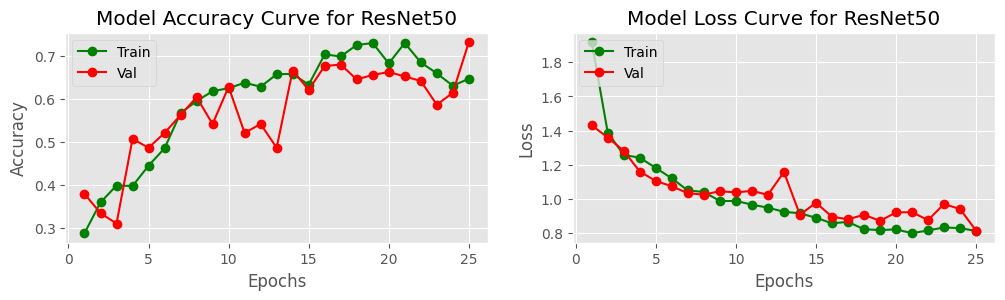

In [ ]:
plot_acc_loss_resnet(history, 25)

In [ ]:
# Check the number of epochs actually trained
print(f"Number of epochs trained: {len(history2.history['loss'])}")

# Plot accuracy and loss
def plot_acc_loss_vgg(history, max_epochs):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_acc_loss_vgg(history2, len(history2.history['loss']))


Number of epochs trained: 21


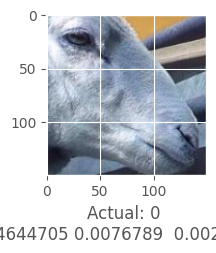

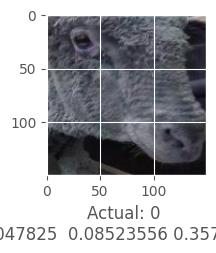

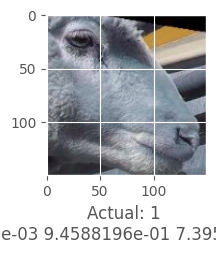

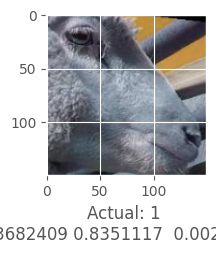

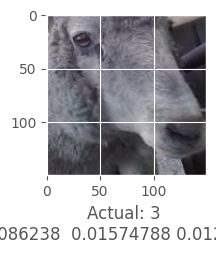

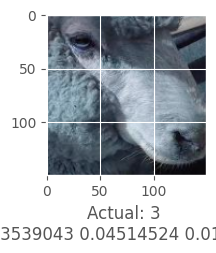

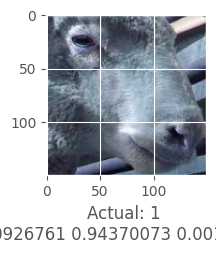

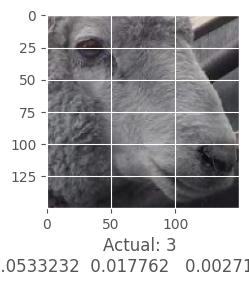

In [ ]:
for i in range(10):
    plt.figure(figsize=(12,7))
    idx = random.randint(0,len(y_test_vgg))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(X_test[idx])
    plt.xlabel(f"Actual: {y_test_vgg[idx]} \n Predicted: {y_pred[idx]}")

plt.tight_layout()
plt.show()